## 위험 요소 등급과 강수량 간의 관계 및 회귀 분석

회귀선의 기울기: 0.831


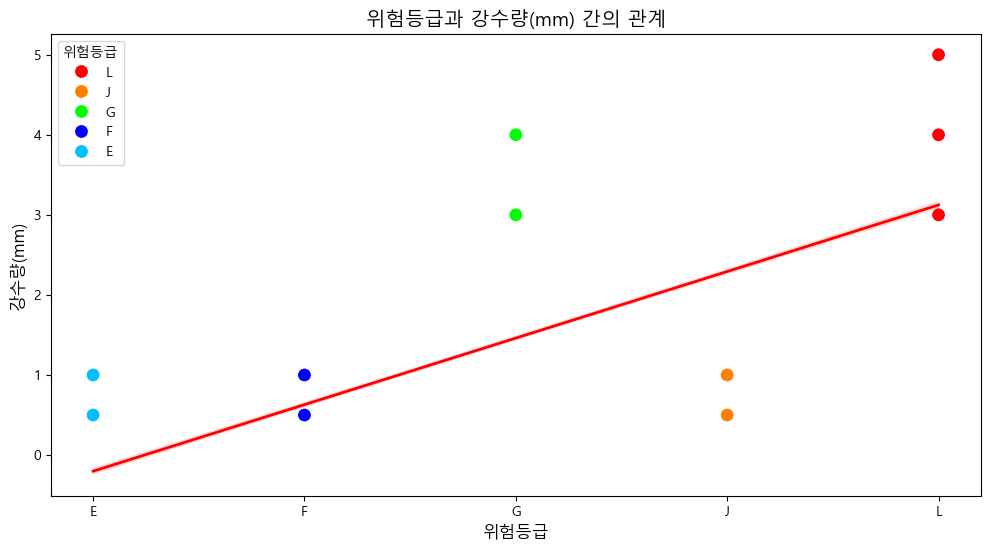

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시

# 데이터 로드
df = pd.read_csv("도로위험상황예보.csv")  # 실행 환경에 CSV 파일 필요
df['RN_1HR'] = pd.to_numeric(df['RN_1HR'], errors='coerce')  # 강수량 열 숫자형으로 변환
df['AIRTP'] = pd.to_numeric(df['AIRTP'], errors='coerce')  # 기온 열 숫자형으로 변환

# 필요한 열만 선택
df = df[['RSK_ELMN_GRD', 'AIRTP', 'RN_1HR']]

# 결측값 제거
df = df.dropna()

# 위험 등급을 숫자로 변환하여 시각화
risk_grade_mapping = {'E': 1, 'F': 2, 'G': 3, 'J': 4, 'L': 5}
df['Risk_Grade_Num'] = df['RSK_ELMN_GRD'].map(risk_grade_mapping)

# 사용자 정의 색상 팔레트
custom_palette = {
    'L': '#FF0000',    # 가장 높은 위험도 -> 빨강
    'J': '#FF7F00',    # 두번째 위험도 -> 주황
    'G': '#00FF00',    # 낮은 위험도 -> 초록
    'F': '#0000FF',    # 아주 낮은 위험도 -> 파랑 
    'E': '#00BFFF'     # 가장 낮은 위험도 -> 하늘
}

# Seaborn scatterplot으로 경향도 분석
plt.figure(figsize=(12, 6))

# 위험 등급(Risk_Grade_Num)과 강수량(RN_1HR)을 시각화
sns.scatterplot(
    x="Risk_Grade_Num",  # x축을 위험 등급으로 변경
    y="RN_1HR", 
    hue="RSK_ELMN_GRD", 
    data=df, 
    palette=custom_palette,  # 사용자 정의 색상 사용
    hue_order=["L", "J", "G", "F", "E"],  # 범례 순서 지정
    s=100  # 점 크기 설정
)

# 위험 등급(Risk_Grade_Num)과 강수량(RN_1HR) 간의 회귀선 추가
sns.regplot(
    x="Risk_Grade_Num",  # x축을 위험 등급으로 변경
    y="RN_1HR", 
    data=df, 
    scatter=False,  # 회귀선만 그리기 위해 scatter=False 설정
    color='blue',  # 회귀선 색상
    line_kws={'color': 'red', 'linewidth': 2}  # 회귀선의 색상과 두께 설정
)

# 회귀선 기울기 구하기
slope, intercept, r_value, p_value, std_err = linregress(df['Risk_Grade_Num'], df['RN_1HR'])

# 기울기 출력
print(f"회귀선의 기울기: {slope:.3f}")

# 그래프 제목과 축 레이블 추가
plt.title("위험등급과 강수량(mm) 간의 관계", fontsize=14)
plt.xlabel("위험등급", fontsize=12)
plt.ylabel("강수량(mm)", fontsize=12)
plt.xticks(ticks=list(risk_grade_mapping.values()), labels=list(risk_grade_mapping.keys()))  # x축 레이블을 위험 등급으로

# 범례 설정
plt.legend(title="위험등급")

# 그래프 보여주기
plt.show()
